<a href="https://colab.research.google.com/github/Maneekul/Senior/blob/main/Tranformer_CCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Some of the implementation of the full transformer architecture was adapted from the imperial NLP course
# https://github.com/ImperialNLP/NLPLabs-2022/tree/main/transformers_code_answers

In [ ]:
!pip install pytorch-lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 905.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 933.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
# Download and install TA-Lib library
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb'
!wget $url/libta-lib0_$ext -qO libta.deb
!wget $url/ta-lib0-dev_$ext -qO ta.deb
!dpkg -i libta.deb ta.deb
!apt-get install -y -f
!pip install ta-lib


Selecting previously unselected package libta-lib0.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.10.2-1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

Reading packa

# try

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, defaultdict
import math
import yfinance as yf
import os
from pytorch_lightning import seed_everything
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torch.nn as nn
import torch.nn.functional as F
from collections import namedtuple, defaultdict
import math
import yfinance as yf
import os
from pytorch_lightning import seed_everything
import random
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
#from pytorch_lightning.strategies import DDPStrategy

In [ ]:
np.random.seed(1233)
torch.manual_seed(1233)
np.random.seed(1233)
seed_everything(1233, workers=True)
os.environ["CUBLAS_WORKSPACE_CONFIG"]=":4096:2"

INFO:lightning_fabric.utilities.seed:Seed set to 1233


In [ ]:
device = ("cuda:0" if torch.cuda.is_available else "cpu")

In [ ]:
device = torch.device('cpu')

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import numpy as np

tickers = ["WMB"]

start="2021-01-01"
end="2023-09-01"

data = yf.download(tickers, start=start, end=end)
trix_data = pd.DataFrame()
for i, ticker in enumerate(tickers):
    high = data['High']
    low = data['Low']
    close = data['Close']
    volume = data['Volume']

    trix = talib.TRIX(close, timeperiod=14)
    df_close_prices = pd.DataFrame(close)
    df_volume_prices = pd.DataFrame(close)
    trix_data[ticker + '_TRIX'] = trix

trix_data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
trix_data

,WMB_TRIX
Date,
2021-03-03,0.334356
2021-03-04,0.341089
2021-03-05,0.350083
2021-03-08,0.357689
2021-03-09,0.357171
...,...
2023-08-25,0.184038
2023-08-28,0.171367
2023-08-29,0.160283


In [ ]:
trix_data["2023-07-01":"2023-07-31"].shape

(20, 1)

#### Feature Indicators

In [ ]:
# Define the normalize_min_max function
def normalize_min_max(values):
    min_val = np.min(values)
    max_val = np.max(values)
    normalized_values = (values - min_val) / (max_val - min_val)
    return normalized_values

[*********************100%%**********************]  1 of 1 completed


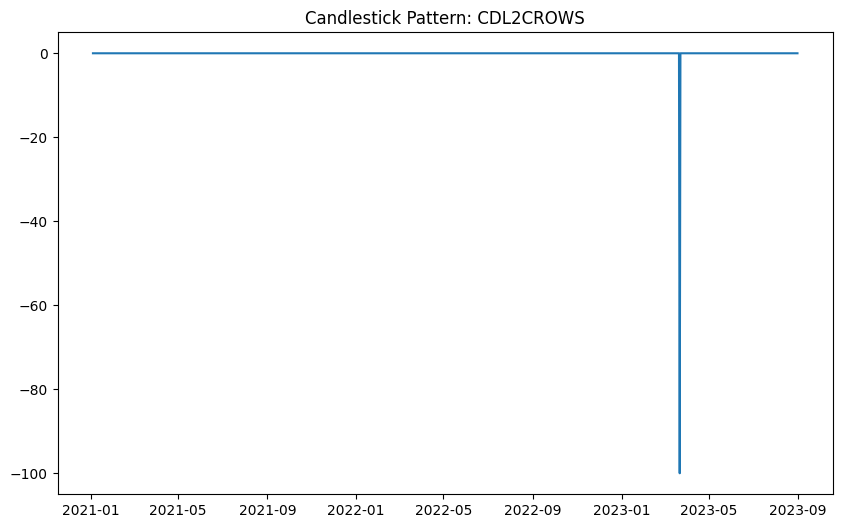

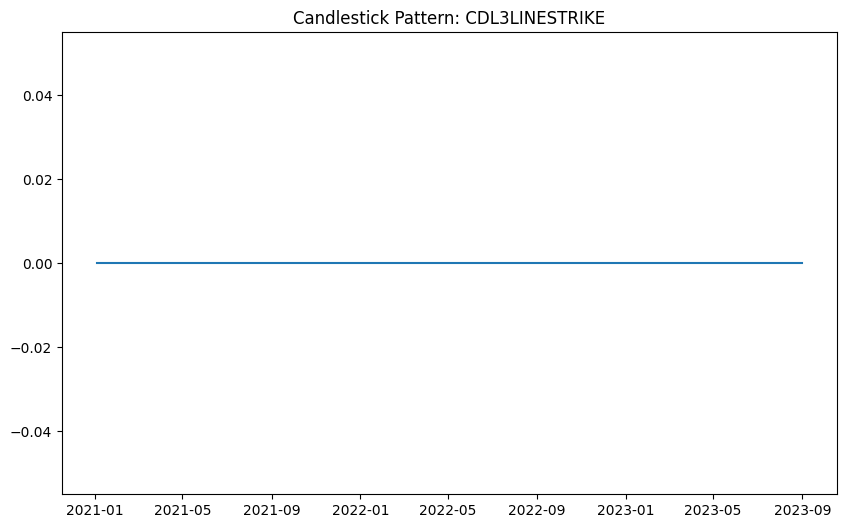

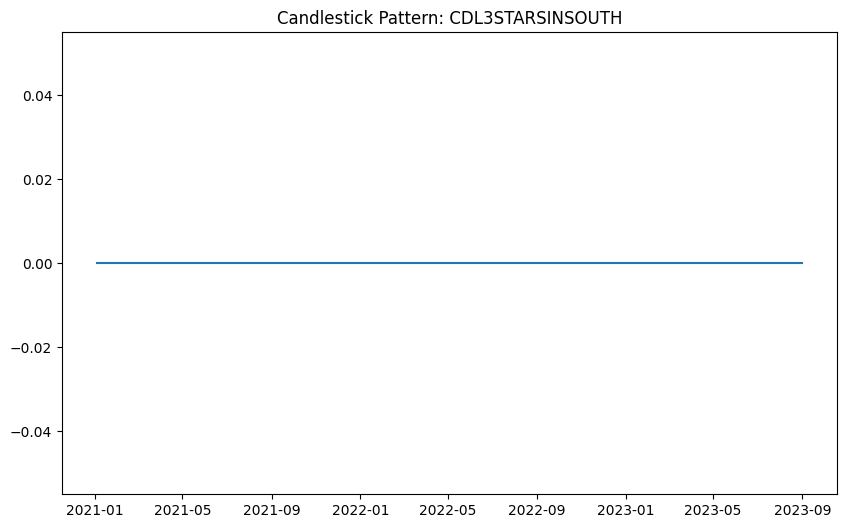

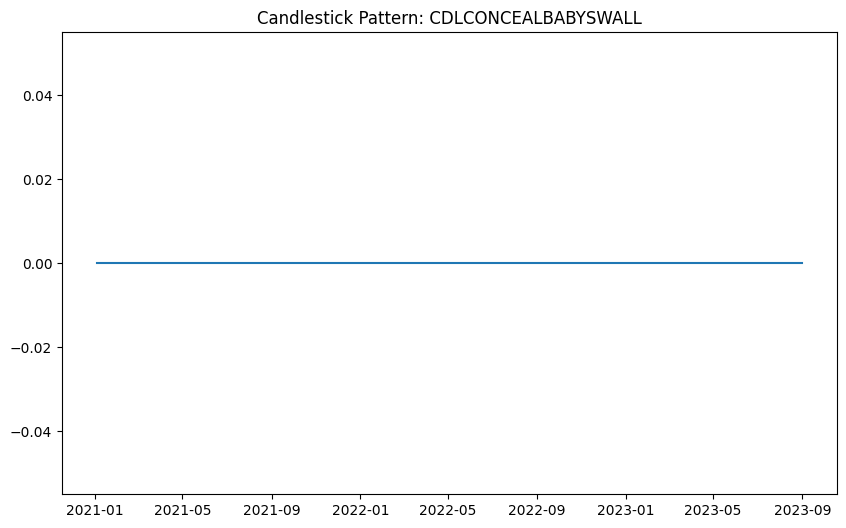

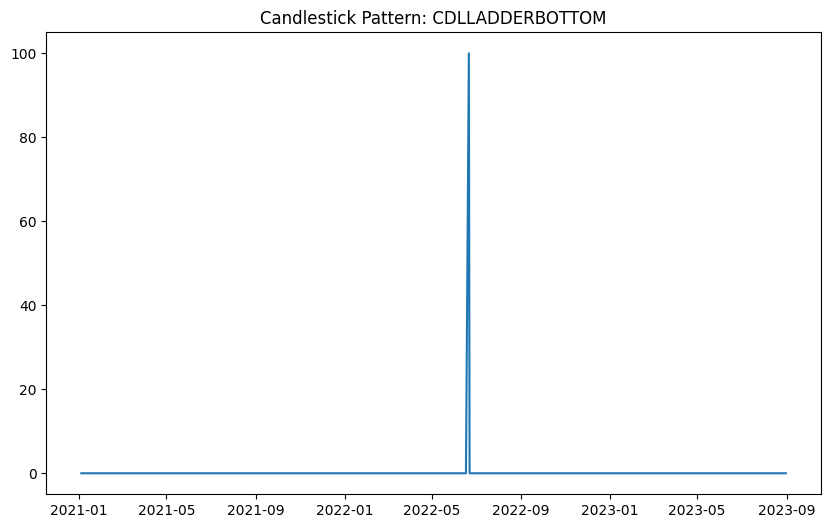

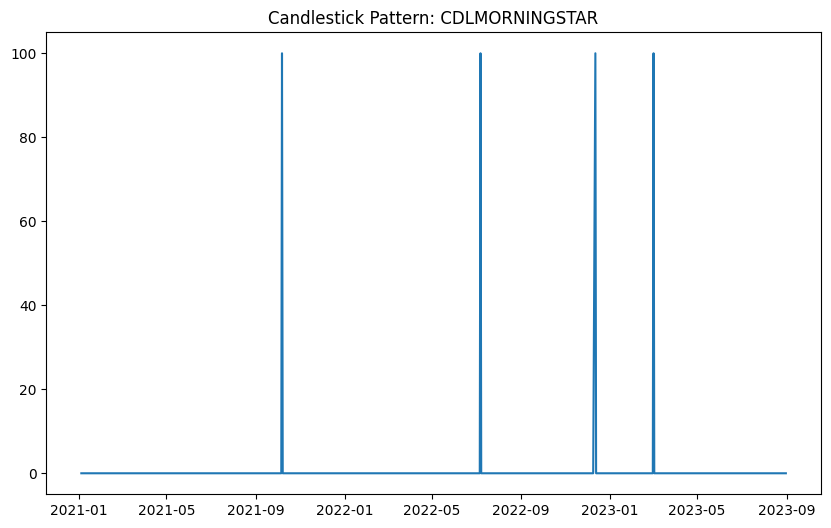

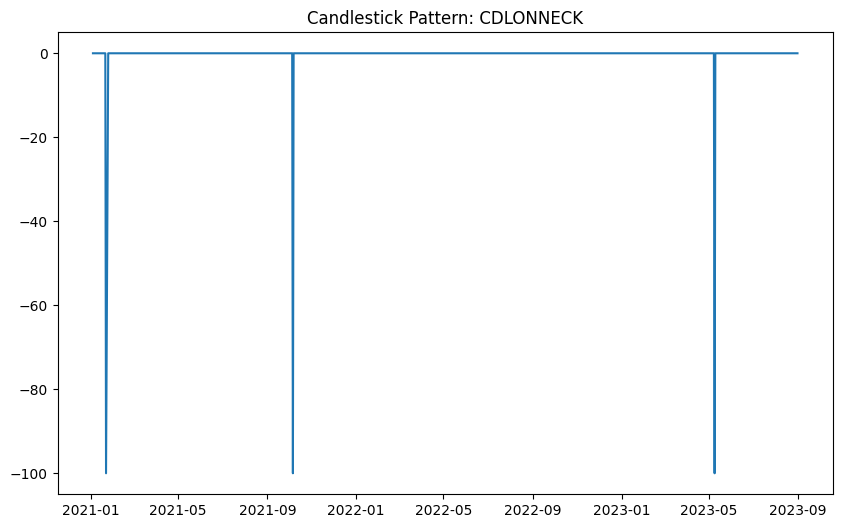

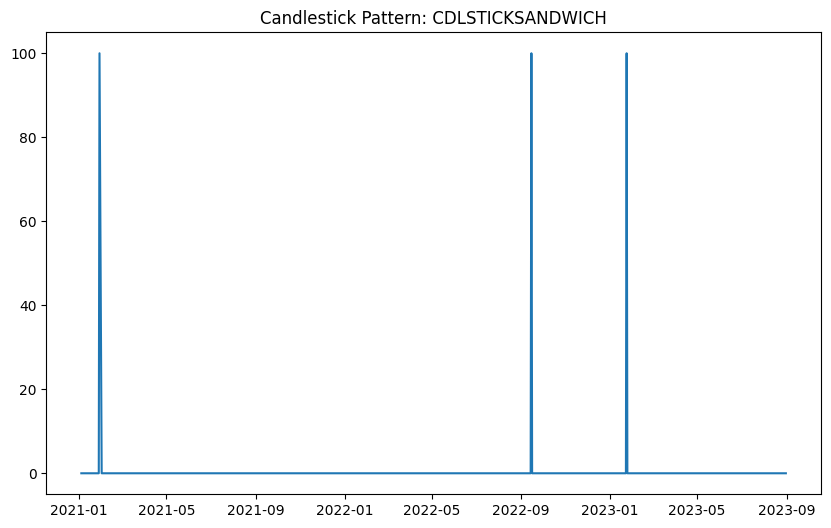

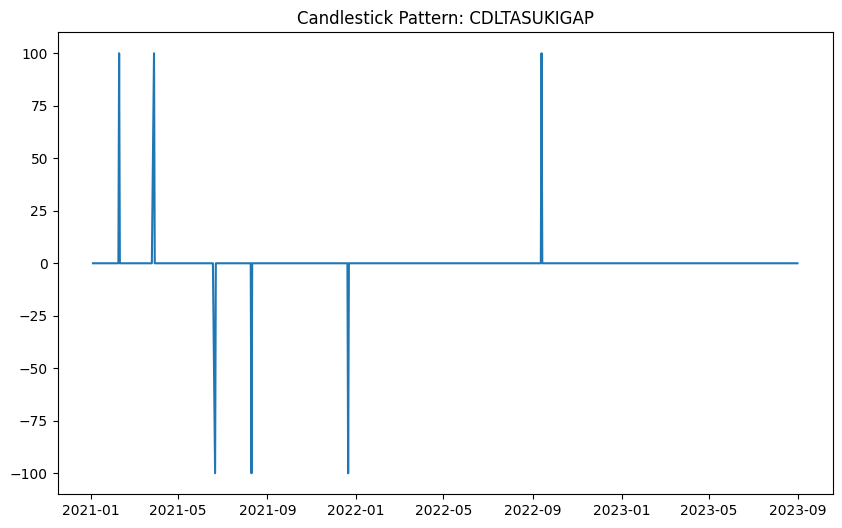

In [ ]:

My_ticker = ["WMB"]
# Define candlestick patterns
candlestick_patterns = [
    "CDL2CROWS", "CDL3LINESTRIKE", "CDL3STARSINSOUTH", "CDLCONCEALBABYSWALL",
    "CDLLADDERBOTTOM", "CDLMORNINGSTAR", "CDLONNECK",
    "CDLSTICKSANDWICH", "CDLTASUKIGAP"
]

pattern_data = {}

# Iterate over tickers
for ticker in My_ticker:
    data = yf.download(ticker,  start=start, end=end)

    # Identify candlestick patterns for each pattern in the list
    for pattern in candlestick_patterns:
        pattern_values = getattr(talib, pattern)(data['Open'], data['High'], data['Low'], data['Close'])
        pattern_data[f"{pattern}_{ticker}"] = pattern_values

# Plotting candlestick patterns
for pattern in candlestick_patterns:
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.title(f"Candlestick Pattern: {pattern}")

    # Plot each ticker's pattern data
    for ticker in My_ticker:
        pattern_values = pattern_data.get(f"{pattern}_{ticker}", None)
        if pattern_values is not None:
            ax.plot(data.index, pattern_values, label=ticker)

    # ax.legend()
    # plt.xlabel("Date")
    # plt.ylabel("Pattern Value")
    # plt.grid(True)
    # plt.show()


In [ ]:

My_ticker = ["WMB"]
#My_ticker = ["AAPL", "MSFT"]

candlestick_patterns = [
    "CDL2CROWS", "CDL3LINESTRIKE","CDL3STARSINSOUTH", "CDLCONCEALBABYSWALL",
    "CDLLADDERBOTTOM", "CDLMORNINGSTAR", "CDLONNECK",
    "CDLSTICKSANDWICH","CDLTASUKIGAP"]

combined_normalized_df = pd.DataFrame()
normalized_dfs = []
pattern_data = {}
stock_pattern_data = {}

for ticker in My_ticker:
    for pattern in candlestick_patterns:
        data = yf.download(ticker, start=start,end=end)
        pattern_values = getattr(talib, pattern)(data['Open'], data['High'], data['Low'], data['Close'])
        normalized_pattern_values = pattern_values
        col_name = f"Normalized_{pattern}_{ticker}"
        # Store the normalized pattern values in the dictionary
        if col_name not in pattern_data:
            pattern_data[col_name] = normalized_pattern_values
        else:
            pattern_data[col_name] = pd.concat([pattern_data[col_name], normalized_pattern_values], axis=1)
        pattern_df = pd.DataFrame(pattern_data, index=data.index)
        pattern_df = pattern_df/100

    ## Calculate Aroon Oscillator
    aroon_oscillator = talib.AROONOSC(data['High'], data['Low'], timeperiod=14)
    my_trix = talib.TRIX(data['Close'], timeperiod=14)
    cci = talib.CCI(data['High'], data['Low'], data['Close'], timeperiod=14)
    macd,_,_ = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    _, middle_band, _ = talib.BBANDS(close, timeperiod=14, nbdevup=2, nbdevdn=2)


    trix_df = pd.DataFrame(my_trix, index=data.index, columns=[f"Trix_{ticker}"])
    aroon_oscillator_df = (pd.DataFrame(aroon_oscillator, index=data.index, columns=[f"AROONOSC_{ticker}"]))/100
    cci_df = pd.DataFrame(cci, index=data.index, columns=[f"CCI_{ticker}"])
    macd_df = pd.DataFrame(macd, index=data.index, columns=[f"MACD_{ticker}"])

    normalized_cci_values= normalize_min_max(cci_df[f"CCI_{ticker}"])


    combined_normalized_df = pd.concat([combined_normalized_df,
                                        aroon_oscillator_df,
                                        pattern_df,
                                        trix_df,
                                        normalized_cci_values,
                                        macd_df,], axis=1)

combined_normalized_df.dropna(inplace=True)
combined_normalized_df = combined_normalized_df.loc[:, ~combined_normalized_df.columns.duplicated()]    # combined_normalized_df = combined__normalized_df_shift
combined_normalized_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
2021-03-03,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-04,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-05,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-08,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-09,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-28,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-29,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585
2023-08-30,-0.642857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151218,0.643172,0.319140


In [ ]:
combined__normalized_df_shift = combined_normalized_df.shift(1)
combined__normalized_df_shift.dropna(inplace=True)
#combined__normalized_df_shift

In [ ]:
combined__normalized_df_shift

,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
2021-03-04,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198727,0.451153,0.364131
2023-08-28,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-29,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-30,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585


#### model

In [ ]:
class AbsolutePositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.3, max_seq_len=200, device="cpu"):
        super().__init__()
        self.d_model = d_model
        self.dropout = nn.Dropout(dropout)

        pe = torch.zeros(max_seq_len, d_model).to(device)
        pos = torch.arange(0, max_seq_len).unsqueeze(1).float()

        two_i = torch.arange(0, d_model, step=2).float()
        div_term = torch.pow(10000, (two_i/torch.Tensor([d_model]))).float()
        pe[:, 0::2] = torch.sin(pos/div_term)
        pe[:, 1::2] = torch.cos(pos/div_term)

        pe = pe.unsqueeze(0)

        self.register_buffer("pe", pe)

    def forward(self, x):
        # shape(x) = [B x seq_len x D]
        pe = self.pe[:, :x.shape[1]].detach()
        x = x.add(pe)
        # shape(x) = [B x seq_len x D]
        return self.dropout(x)

In [ ]:
class Time2VecPositonalEncoding(nn.Module):
    def __init__(self,input_dim, output_dim, activation="sine"):
        super().__init__()
        self.linear_layer = nn.Linear(input_dim, 1)
        self.periodic_layer = nn.Linear(input_dim, output_dim - 1)
        self.activation = activation

    def forward(self, x):

        if self.activation == "sine":
            periodic_out = torch.sin(self.periodic_layer(x))
        elif self.activation == "cos":
            periodic_out = torch.cos(self.periodic_layer(x))


        original_out = self.linear_layer(x)

        out = torch.cat([periodic_out, original_out], 2)

        return out

In [ ]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, config):
        super().__init__()

        # print(config)
        dropout = config["dropout"]
        device = config["device"]
        max_seq_len = config["max_seq_len"]
        self.dropout = nn.Dropout(p=dropout)

        input_dim, d_model = config["input_dim"], config["d_model"]
        self.inputProjection = nn.Linear(input_dim, d_model)
        self.targetProjection = nn.Linear(input_dim, d_model)


        n_head, num_enc_layers, num_dec_layers = config["n_head"], config["num_enc_layers"], config["num_dec_layers"]
        self.transformer = nn.Transformer(d_model, n_head, num_enc_layers, num_dec_layers,
            dim_feedforward= 4 * d_model, dropout=dropout, batch_first=True, device=device)

        self.encoderLayer = nn.TransformerEncoderLayer(d_model, n_head, dim_feedforward=4 * d_model, dropout=dropout, batch_first=True)
        self.encoder = nn.TransformerEncoder(self.encoderLayer, num_enc_layers)

        steps_ahead = config["steps_ahead"]
        self.linear = nn.Linear(d_model, 1)
        self.decoder = nn.Linear(d_model * steps_ahead, steps_ahead)
        self.d_model = d_model
        self.use_encoder_only = config["use_encoder_only"]
        self.useInputProjection = config["use_input_projections"]

        self.isClassification = config["is_classification"]


        if config["use_absolute_enc"]:
            self.inputPosEncoding = AbsolutePositionalEncoding(d_model, dropout, max_seq_len, device)
            self.outputPosEncoding = AbsolutePositionalEncoding(d_model, dropout, max_seq_len, device)
        else:
            time2vecActivation = config["activation"]
            self.inputPosEncoding = Time2VecPositonalEncoding(input_dim, d_model, time2vecActivation)
            self.outputPosEncoding = Time2VecPositonalEncoding(input_dim, d_model, time2vecActivation)


        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def create_mask(self, size):
        return torch.triu(torch.ones(size, size) * float('-inf'), diagonal=1)

    def forward(self, src, trg):
        src_mask = self.create_mask(src.shape[1])
        src_mask = src_mask.type_as(src)
        trg_mask = self.create_mask(trg.shape[1])
        trg_mask = trg_mask.type_as(trg)
        if self.useInputProjection:
            src = self.inputProjection(src)
            trg = self.targetProjection(trg)

        if self.use_encoder_only:
            src = self.inputPosEncoding(src)
            out = self.encoder(src, src_mask)
            out = self.linear(out)
            if self.isClassification:
                out = F.log_softmax(out)
            return out
        else:
            src = self.inputPosEncoding(src)
            trg = self.outputPosEncoding(trg)

            out = self.transformer(src, trg, tgt_mask=trg_mask)
            out = self.linear(out)
            # out = self.decoder(out.flatten(start_dim=1))
            if self.isClassification:
                out = F.log_softmax(out)
            return out


In [ ]:
def r2_loss(output, target):
    target_mean = torch.mean(target)
    ss_tot = torch.sum((target - target_mean) ** 2)
    ss_res = torch.sum((target - output) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

In [ ]:
def flatten(t):
    return [item for sublist in t for item in sublist]

def get_prediction(t):
    return [arr.view(-1) for arr in t]

In [ ]:
class TransformerTrainer(pl.LightningModule):
    def __init__(self, config):
        super().__init__()
        self.save_hyperparameters()

        config["device"] = self.hparams.config['device']
        self.model = TimeSeriesTransformer(config)

        self.d_model= config["d_model"]
        self.warmup_steps = config["warmup_steps"]
        self.lr = config["lr"]
        self.device_ = self.hparams.config['device']
        self.config = config
        self.training_len = config["training_len"]
        self.sampling = config["sampling"]
        self.forecast_window = config["steps_ahead"]
        self.k = config["k"]
        self.threshold = config["threshold"]
        self.validation_step_outputs = []

        if config["loss"] == 'mse':
            self.criterion = nn.MSELoss(reduction='sum')
        else:
            self.criterion = r2_loss


    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.lr)

    def change_lr_in_optimizer(self):
        min_arg1 = math.sqrt(self.global_step)
        min_arg2 = self.global_step * (self.warmup_steps**-1.5)
        lr = math.sqrt(self.d_model) * min(min_arg1, min_arg2)
        self.trainer.optimizers[0].param_groups[0]['lr'] = lr

    def prob_get_true_val(self, p):
        return random.random() < p

    def n_step_forward(self, src, trg):
        sampled_input = src
        all_preds = []

        # src.shape: [64, 60, 6]
        # tgt_in.shape: [64, 30, 6]
        # tgt_out: [64, 30]

        for i in range(self.forecast_window):

            pred = self.model(sampled_input, trg[:, i, :].unsqueeze(1))
            ## pred shape: [B * 1 * 1]

            if all_preds == []:
                all_preds = pred
            else:
                all_preds = torch.cat((all_preds, pred), dim=1)

            p = self.k / (self.k + math.exp(self.current_epoch/self.k))

            prob_true_val = True
            if self.sampling and i > self.threshold:
                prob_true_val = self.prob_get_true_val(p)

            if prob_true_val and i > self.threshold:
                sampled_input = torch.cat((sampled_input[:, 1:, :].detach(), trg[:, i, :].unsqueeze(1).detach()), dim=1)
            # else:
            #     sampled_input = torch.cat((sampled_input[:, 1:, :].detach(), pred.detach()), dim=1)

        return all_preds

    def training_step(self, batch, batch_idx):
        src, trg_in, targets = batch

        y_hat = self.n_step_forward(src, trg_in)
        y_hat = y_hat.squeeze(-1)
        y = targets

        loss = self.criterion(y_hat, y)

        self.log("train_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        pearson_corr = self.calc_pearson_coeff(y_hat, y)

        self.log("train_pearson_coef", pearson_corr ,on_step=True, on_epoch=True, prog_bar=True, logger=True)

        self.change_lr_in_optimizer()
        return loss

    def on_training_epoch_end(self, outputs):
        avg_loss = torch.stack(
            [x["loss"].detach() for x in outputs]).mean()

        if self.current_epoch % 5 == 0:
            self.print_predictions(train_loader_unshuffled, train_output_img_dir+"train", "Training")

        self.log_dict({"train_loss_epoch": avg_loss, "step":self.current_epoch})


    def print_predictions(self, dataloader, file_prefix, title="Validation"):
        # print predictiion of first 1024 + 100 data points
        with torch.no_grad():
            all_predictions = []
            init_train_data = []
            all_targets = []
            for step, trng_data in enumerate(dataloader):
                if step == 1:
                    break

                src, _, targets = trng_data
                all_targets.append(targets[0].detach().cpu())

                if step == 0:
                    init_train_data = src[0, :, 0].reshape(-1)

                prediction = self(trng_data)
                all_predictions.append(prediction[0].detach().cpu())


            all_predictions = flatten(get_prediction(all_predictions))
            all_predictions = np.array(all_predictions)
            all_targets = flatten(get_prediction(all_targets))
            all_targets = np.array(all_targets)

            # print(all_predictions.shape)
            # print(all_targets.shape)
            # print(init_train_data.shape)

            # inverse transform
            init_train_data = train_targets_scaler.inverse_transform(init_train_data.reshape(-1, 1)).reshape(-1)
            all_predictions = train_targets_scaler.inverse_transform(all_predictions.reshape(-1, 1)).reshape(-1)
            all_targets = train_targets_scaler.inverse_transform(all_targets.reshape(-1, 1)).reshape(-1)

            end_plot_idx = self.training_len + len(all_predictions)
            plt.figure(figsize=(8, 6))
            plt.plot(init_train_data, label='trailing')
            plt.plot(np.arange(self.training_len, end_plot_idx), all_predictions, label="predicted")
            plt.plot(np.arange(self.training_len, end_plot_idx), all_targets, label="actual")
            plt.title(f"{title} prediction for epoch {self.current_epoch}")
            plt.legend()
            plt.grid()

            if not os.path.exists(file_prefix):
                os.makedirs(file_prefix)

            plt.savefig(f"{file_prefix}/Next_{len(all_predictions)}_preds_Epoch_{self.current_epoch}.jpg", bbox_inches="tight")

            plt.close()
            # plt.show()

    def validation_step(self, batch, batch_idx):
        src, trg_in, targets = batch

        y_hat = self.n_step_forward(src, trg_in)
        y_hat = y_hat.squeeze(-1)
        y = targets

        loss = self.criterion(y_hat, y)

        self.log("valid_loss", loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)

        pearson_corr = self.calc_pearson_coeff(y_hat, y)

        self.log("val_pearson_coef", pearson_corr ,on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss


    def calc_pearson_coeff(self, y_pred, y):

        predicted = y_pred
        targets = y
        vy_pred = predicted - torch.mean(predicted)
        vy = targets - torch.mean(targets)
        denom = torch.sum(vy_pred ** 2) * torch.sum(vy ** 2)

        corr = torch.sum(vy_pred * vy) / torch.sqrt(denom)

        return corr

    # def on_validation_epoch_end(self, outputs):
    #     avg_loss = torch.stack(
    #         [x.detach() for x in outputs]).mean()

    #     self.log("ptl/val_loss", avg_loss)

    #     if self.current_epoch % 5 == 0:
    #         self.print_predictions(val_loader, train_output_img_dir+"val")

    #     self.log_dict({"valid_loss_epoch": avg_loss, "step":self.current_epoch})


    def forward(self, x):
        src, trg_in, _ = x
        src = src.to(self._device)
        trg_in = trg_in.to(self._device)
        return self.n_step_forward(src, trg_in)


#### Create Sequence Dataset

In [ ]:
f_multiplier = 1_000_000
f_multiplier = 1
class FeaturesDataset(Dataset):
    def __init__(self, features, targets, training_len, forecast_len):
        super().__init__()
        self.features = features
        self.targets = targets
        self.training_len = training_len
        self.forecast_len = forecast_len
        self.feature_len = len(features)

    def __len__(self):
        return self.feature_len - self.training_len - self.forecast_len + 1

    def __getitem__(self, idx):

        end_trng_idx = idx + self.training_len
        end_target_idx = end_trng_idx + self.forecast_len

        train_features = torch.as_tensor(f_multiplier * self.features[idx:end_trng_idx], dtype=torch.float32)
        # first output to decoder is last input to encoder
        target_features = torch.as_tensor(f_multiplier * self.features[end_trng_idx - 1:end_target_idx - 1], dtype=torch.float32)
        target_values = torch.as_tensor(self.targets[end_trng_idx:end_target_idx], dtype=torch.float32)

        return FeaturesAndTarget(train_features, target_features, target_values)

#### Import yfinance

In [ ]:
# print(prices_data[:10])

In [ ]:
def create_features(prices_data):

    features = pd.DataFrame(dict(px=prices_data)).assign(
        dpx1 = lambda x: x.px.ewm(span=8).mean() - x.px.ewm(span=32).mean(),
        dpx2 = lambda x: x.px.ewm(span=32).mean() - x.px.ewm(span=64).mean(),
        dpx3 = lambda x: x.px.ewm(64).mean() - x.px.ewm(128).mean(),
        dpx4 = lambda x: x.px.ewm(128).mean() - x.px.ewm(256).mean(),
        dpx5 = lambda x: x.px.ewm(12).mean() - x.px.ewm(26).mean(),
        # dpx1 = lambda x: x.px.ewm(20).mean(),
        # dpx2 = lambda x: x.px.ewm(50).mean(),
        # dpx3 = lambda x: x.px.ewm(100).mean(),
        # adj_close_diff_1 = lambda x: x.px.diff(),
        # adj_close_pct_diff = lambda x: x.px.pct_change(),
        # dpx1 = lambda x: np.diff(x.px, prepend=x.px[0]),
        # dpx2 = lambda x: np.diff(x.px, n=2, prepend=[x.px[0], x.px[0]]),
        # dpx4 = lambda x: x.px.ewm(256).mean() - x.px.ewm(512).mean(),
    )

    return features

In [ ]:
# features = create_features(prices_data)

In [ ]:
combined__normalized_df_shift

,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
2021-03-04,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198727,0.451153,0.364131
2023-08-28,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-29,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-30,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585


In [ ]:
combined_14 = (pd.concat([df_close_prices, combined__normalized_df_shift], axis=1)).dropna()
combined_14

,Close,AROONOSC_WMB,Normalized_CDL2CROWS_WMB,Normalized_CDL3LINESTRIKE_WMB,Normalized_CDL3STARSINSOUTH_WMB,Normalized_CDLCONCEALBABYSWALL_WMB,Normalized_CDLLADDERBOTTOM_WMB,Normalized_CDLMORNINGSTAR_WMB,Normalized_CDLONNECK_WMB,Normalized_CDLSTICKSANDWICH_WMB,Normalized_CDLTASUKIGAP_WMB,Trix_WMB,CCI_WMB,MACD_WMB
2021-03-04,24.110001,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,24.260000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,24.120001,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,23.559999,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,24.400000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,34.669998,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198727,0.451153,0.364131
2023-08-28,34.869999,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-29,34.880001,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-30,35.000000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585


In [ ]:
print(combined_14.columns)

Index(['Close', 'AROONOSC_WMB', 'Normalized_CDL2CROWS_WMB',
       'Normalized_CDL3LINESTRIKE_WMB', 'Normalized_CDL3STARSINSOUTH_WMB',
       'Normalized_CDLCONCEALBABYSWALL_WMB', 'Normalized_CDLLADDERBOTTOM_WMB',
       'Normalized_CDLMORNINGSTAR_WMB', 'Normalized_CDLONNECK_WMB',
       'Normalized_CDLSTICKSANDWICH_WMB', 'Normalized_CDLTASUKIGAP_WMB',
       'Trix_WMB', 'CCI_WMB', 'MACD_WMB'],
      dtype='object')


In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
    'Close': 'px',
    'AROONOSC_WMB': 'dpx1',
    'Normalized_CDL2CROWS_WMB': 'dpx2',
    'Normalized_CDL3LINESTRIKE_WMB': 'dpx3',
    'Normalized_CDL3STARSINSOUTH_WMB': 'dpx4',
    'Normalized_CDLCONCEALBABYSWALL_WMB': 'dpx5',
    'Normalized_CDLLADDERBOTTOM_WMB': 'dpx6',
    'Normalized_CDLMORNINGSTAR_WMB': 'dpx7',
    'Normalized_CDLONNECK_WMB': 'dpx8',
    'Normalized_CDLSTICKSANDWICH_WMB': 'dpx9',
    'Normalized_CDLTASUKIGAP_WMB': 'dpx10',
    'Trix_WMB': 'dpx11',
    'CCI_WMB': 'dpx12',
    'MACD_WMB': 'dpx13'
}

# Renaming the columns
combined_14.rename(columns=new_column_names, inplace=True)



In [ ]:
combined_14

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
2021-03-04,24.110001,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,24.260000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,24.120001,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,23.559999,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,24.400000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,34.669998,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198727,0.451153,0.364131
2023-08-28,34.869999,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-29,34.880001,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-30,35.000000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585


#### Import Data

In [ ]:
FeaturesAndTarget = namedtuple('FeaturesAndTarget', ['train_features', 'target_features', 'target_values'])

#### Splitting Data


In [ ]:
def split_data(features):
    train_idx = int(features.shape[0]*0.6)
    val_idx = int(features.shape[0] * 0.2)
    train_features = features[:train_idx]
    val_features = features[train_idx:train_idx + val_idx]
    test_features = features[train_idx + val_idx:]

    return train_features, val_features, test_features

In [ ]:
combined_14

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
2021-03-04,24.110001,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,24.260000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,24.120001,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,23.559999,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,24.400000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,34.669998,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198727,0.451153,0.364131
2023-08-28,34.869999,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184038,0.471576,0.338200
2023-08-29,34.880001,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171367,0.546381,0.329984
2023-08-30,35.000000,-0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160283,0.533749,0.320585


In [ ]:
train_features, val_features, test_features = split_data(combined_14)
train_features.head()

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
2021-03-04 00:00:00,24.110001,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05 00:00:00,24.260000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08 00:00:00,24.120001,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09 00:00:00,23.559999,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10 00:00:00,24.400000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883


#### Parameters

In [ ]:
params = dict(
    training_len=60,
    val_len=60,
    max_seq_len=1000,
    batch_size=64,
    d_model=128,
    lr = 1e-3,
    steps_ahead=20,
    input_dim=14,
    n_head=8,
    num_enc_layers=3,
    num_dec_layers=3,

    dropout=0.1,
    use_encoder_only=False,
    use_absolute_enc=True,
    use_input_projections=True,
    is_classification=False,
    device=device,
    warmup_steps=6000,
    loss='mse',
    scale=True,  # True
    activation="sine",
    k = 60,
    prices_only = False,
    sampling =False,
    threshold=-1
)

#### Preprocessing Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_features_scaler = MinMaxScaler(feature_range=(-1, 1))
train_targets_scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
def preprocess_data_kk(train_features, val_features, test_features):

    train_ema = train_features.filter(like='dpx').values
    val_ema = val_features.filter(like='dpx').values
    test_ema = test_features.filter(like='dpx').values

    train_px = train_features['px'].values
    val_px = val_features['px'].values
    test_px = test_features['px'].values

    # Skip normalization for 'dpx' features
    f_train_ema = train_ema
    f_val_ema = val_ema
    f_test_ema = test_ema

    if params['scale']:
        # Only normalize 'px' feature
        train_targets_scaler.fit(train_px.reshape(-1, 1))

        f_train_px = train_targets_scaler.transform(train_px.reshape(-1, 1))
        f_val_px = train_targets_scaler.transform(val_px.reshape(-1, 1))
        f_test_px = train_targets_scaler.transform(test_px.reshape(-1, 1))

        f_train_values = np.concatenate([f_train_px, f_train_ema], axis=1)
        f_val_values = np.concatenate([f_val_px, f_val_ema], axis=1)
        f_test_values = np.concatenate([f_test_px, f_test_ema], axis=1)

    # price only data
    if params["prices_only"]:
        f_train_values = f_train_values[:, 0].reshape(-1, 1)
        f_val_values = f_val_values[:, 0].reshape(-1, 1)
        f_test_values = f_test_values[:, 0].reshape(-1, 1)

        f_train_targets = f_train_values.reshape(-1)
        f_val_targets = f_val_values.reshape(-1)
        f_test_targets = f_test_values.reshape(-1)

    else:
        # all values, incl price

        f_train_targets = f_train_values[:, 12].reshape(-1)
        f_val_targets = f_val_values[:, 12].reshape(-1)
        f_test_targets = f_test_values[:, 12].reshape(-1)


    return f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets

def preprocess_data(train_features, val_features, test_features):

    train_ema = train_features.filter(like='dpx').values
    val_ema = val_features.filter(like='dpx').values
    test_ema = test_features.filter(like='dpx').values

    train_px = train_features['px'].values
    val_px = val_features['px'].values
    test_px = test_features['px'].values


    if params['scale']:
        train_features_scaler.fit(train_ema)
        train_targets_scaler.fit(train_px.reshape(-1, 1))


    if params['scale']:
        f_train_ema = train_features_scaler.transform(train_ema)
        f_val_ema = train_features_scaler.transform(val_ema)
        f_test_ema = train_features_scaler.transform(test_ema)
        f_train_px = train_targets_scaler.transform(train_px.reshape(-1, 1))
        f_val_px = train_targets_scaler.transform(val_px.reshape(-1, 1))
        f_test_px = train_targets_scaler.transform(test_px.reshape(-1, 1))

        f_train_values = np.concatenate([f_train_px, f_train_ema], axis=1)
        f_val_values = np.concatenate([f_val_px, f_val_ema], axis=1)
        f_test_values = np.concatenate([f_test_px, f_test_ema], axis=1)

    # price only data
    if params["prices_only"]:
        f_train_values = f_train_values[:, 0].reshape(-1, 1)
        f_val_values = f_val_values[:, 0].reshape(-1, 1)
        f_test_values = f_test_values[:, 0].reshape(-1, 1)

        f_train_targets = f_train_values.reshape(-1)
        f_val_targets = f_val_values.reshape(-1)
        f_test_targets = f_test_values.reshape(-1)

    else:
        # all values, incl price

        f_train_targets = f_train_values[:, 11].reshape(-1)
        f_val_targets = f_val_values[:, 11].reshape(-1)
        f_test_targets = f_test_values[:, 11].reshape(-1)

    return f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets

In [ ]:
f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets = preprocess_data(train_features, val_features, test_features)

In [ ]:
f_train_valuesk, f_val_valuesk, f_test_valuesk, f_train_targetsk, f_val_targetsk, f_test_targetsk = preprocess_data_kk(train_features, val_features, test_features)

In [ ]:
train_features

,px,dpx1,dpx2,dpx3,dpx4,dpx5,dpx6,dpx7,dpx8,dpx9,dpx10,dpx11,dpx12,dpx13
2021-03-04,24.110001,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.334356,0.745660,0.464161
2021-03-05,24.260000,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.341089,0.766028,0.499711
2021-03-08,24.120001,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.350083,0.744948,0.533834
2021-03-09,23.559999,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357689,0.711603,0.543317
2021-03-10,24.400000,0.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.357171,0.594389,0.499883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,35.580002,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237185,0.734040,0.628333
2022-08-25,35.599998,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.257367,0.737217,0.689151
2022-08-26,35.029999,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.277005,0.738293,0.730543
2022-08-29,35.240002,0.928571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.290496,0.667836,0.709177


In [ ]:
train_features.shape , val_features.shape, test_features.shape

((377, 14), (125, 14), (127, 14))

In [ ]:
print(f'{f_train_targets.shape = }, {f_val_targets.shape = }, {f_test_targets.shape = },')
print(f'{train_features.shape = }, {f_val_values.shape = }, {f_test_values.shape = },')


f_train_targets.shape = (377,), f_val_targets.shape = (125,), f_test_targets.shape = (127,),
train_features.shape = (377, 14), f_val_values.shape = (125, 14), f_test_values.shape = (127, 14),


#### Defining datasets

In [ ]:
training_len = params['training_len']
forecast_len = params['steps_ahead']

print(training_len)
print(forecast_len)

60
20


In [ ]:
import random
def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

gen = torch.Generator()
gen.manual_seed(1233)

In [ ]:
batch_size = 64

train_dataset = FeaturesDataset(f_train_values, f_train_targets, params['training_len'], forecast_len)
val_dataset = FeaturesDataset(f_val_values, f_val_targets, params['val_len'], forecast_len)
test_dataset = FeaturesDataset(f_test_values, f_test_targets, params['val_len'], forecast_len)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, worker_init_fn=seed_worker, generator=gen)   #num_workers=2
val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2
train_loader_unshuffled = DataLoader(train_dataset, batch_size, shuffle=False, num_workers=2)  #num_workers=2

In [ ]:
src, trg_in, trg_out = next(iter(train_loader))
print(src.shape)
print(trg_in.shape)
print(trg_out.shape)

torch.Size([64, 60, 14])
torch.Size([64, 20, 14])
torch.Size([64, 20])


#### Define trainer

In [ ]:
log_dir = "transformer_n_step_ahead_logs"
model_dir = "transformer_n_step_ahead_models"

device = ("cuda:0" if torch.cuda.is_available else "cpu")



def train(ticker, version_name='', model_name ='', ckpt_dir='w2v'):

    if version_name == '':
        version_name = ticker

    if model_name == '':
        model_name = ticker

    logger = TensorBoardLogger(
        save_dir=log_dir,
        version=f'{version_name}_{ckpt_dir}'
    )

    checkpoint_callback = ModelCheckpoint(
        monitor="valid_loss_epoch",
        mode="min",
        dirpath=f"{model_dir}/{ckpt_dir}/{model_name}",
        filename="{epoch}-{valid_loss_epoch:.4f}",
        save_last= True,
        save_top_k=2
    )

    early_stopping_callback = EarlyStopping(
        monitor="valid_loss_epoch",
        mode="min",
        patience=100
    )

    metrics = {"loss": "ptl/val_loss"}

    trainer = pl.Trainer(
        max_epochs=60,  #200
        #gpus=1,
        logger=logger,
        callbacks=[checkpoint_callback, early_stopping_callback],
        log_every_n_steps=7,
       # strategy=DDPStrategy(find_unused_parameters=True),
    )

    stock_model = TransformerTrainer(params)

    trainer.fit(stock_model, train_loader, val_loader)

    return trainer, stock_model


In [ ]:
print(params)

{'training_len': 60, 'val_len': 60, 'max_seq_len': 1000, 'batch_size': 64, 'd_model': 128, 'lr': 0.001, 'steps_ahead': 20, 'input_dim': 14, 'n_head': 8, 'num_enc_layers': 3, 'num_dec_layers': 3, 'dropout': 0.1, 'use_encoder_only': False, 'use_absolute_enc': True, 'use_input_projections': True, 'is_classification': False, 'device': device(type='cpu'), 'warmup_steps': 6000, 'loss': 'mse', 'scale': True, 'activation': 'sine', 'k': 60, 'prices_only': False, 'sampling': False, 'threshold': -1}


#### Evaluation metrics

In [ ]:
def get_nth_prediction(preds, n=0):
    return preds[n]

def concat_preds(preds):
    return np.concatenate(preds, axis=0)

def revert_transform(values):
    return train_targets_scaler.inverse_transform(values.reshape(-1, 1)).reshape(-1)

def get_prediction_value(preds):
    return [x.cpu().detach().numpy() for x in preds]

def forecast(stock_model, trainer, ckpt_path, test_loader, nth_pred):
    with torch.no_grad():
        predictions = trainer.predict(dataloaders=test_loader, model=stock_model, ckpt_path=ckpt_path)

    all_predictions = concat_preds(predictions)
    predictions_flattened = np.array(flatten(get_nth_prediction(all_predictions, nth_pred)))

    return predictions_flattened

def evaluate(pred, y):
    pred = revert_transform(pred)
    y = revert_transform(y)

    rmse = calculate_rmse(y, pred)
    mse = rmse ** 2
    mape = calculate_mape(y, pred)

    r = calc_pearson_coeff(pred, y)

    res = dict(
        rmse = rmse,
        mse =mse,
        mape =mape,
        r = r
    )

    return res


In [ ]:
def mse_loss(pred, target, reduction='sum'):
    loss = np.sum(np.square(pred - target))
    if reduction == "sum":
        return loss
    else:
        return loss / len(pred)

def calculate_rmse(y_true, y_pred):

    rmse = np.sqrt(np.mean((y_true-y_pred)**2))
    return rmse

def calculate_mape(y_true, y_pred):

    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    mape = np.mean(np.abs((y_true-y_pred) / y_true))*100
    return mape


def calc_pearson_coeff(y_pred, y):

    predicted = y_pred
    targets = y
    vy_pred = predicted - np.mean(predicted)
    vy = targets - np.mean(targets)
    denom = np.sum(vy_pred ** 2) * np.sum(vy ** 2)

    corr = np.sum(vy_pred * vy) / np.sqrt(denom)

    return corr

In [ ]:
savefig = False
img_folder = "output_imgs/transformer_n_step/w2v/prices/"

def gen_fig(preds, eval_res, targets, img_folder, title, i = 0, savefig=False):
    if not os.path.exists(img_folder):
        os.makedirs(img_folder)

    plt.figure(figsize=(8, 6))

    start_idx = training_len + i
    end_idx = training_len + len(preds) + i

    filename = f"{img_folder}{ticker}_results.txt"
    if savefig:
        if os.path.exists(filename):
            f = open(filename, "a")
            f.write("\n")
        else:
            f = open(filename, "x")

    for metric in eval_res.keys():
        print(f"Metric {metric}: {eval_res[metric]}")
        if savefig:
            f.write(f"Metric {metric}: {eval_res[metric]}\n")

    plt.plot(list(range(start_idx, end_idx)), revert_transform(preds), label="predicted")
    plt.plot(list(range(start_idx, end_idx)), revert_transform(targets), label="target")
    plt.plot(revert_transform(f_test_targets[:training_len]), label="trailing")

    plt.title(f"{title}")
    plt.legend()
    plt.grid()

    if savefig:
        plt.savefig(f"{img_folder}{ticker}_all_preds.jpg", bbox_inches="tight")

    plt.show()


#### Running model on all stock data

In [ ]:
print(params)

{'training_len': 60, 'val_len': 60, 'max_seq_len': 1000, 'batch_size': 64, 'd_model': 128, 'lr': 0.001, 'steps_ahead': 20, 'input_dim': 14, 'n_head': 8, 'num_enc_layers': 3, 'num_dec_layers': 3, 'dropout': 0.1, 'use_encoder_only': False, 'use_absolute_enc': True, 'use_input_projections': True, 'is_classification': False, 'device': device(type='cpu'), 'warmup_steps': 6000, 'loss': 'mse', 'scale': True, 'activation': 'sine', 'k': 60, 'prices_only': False, 'sampling': False, 'threshold': -1}


In [ ]:
f_test_targets.shape

(127,)

In [ ]:
shorter_tickers =["WMB"]  #  ["JNJ", "^GSPC"]
ckpt_dir='w2v_sampling'

for v in range(1):
    for ticker in shorter_tickers:
        # prices_data = yf.download(ticker, "2012-01-01", "2023-12-31")
        # prices_data = prices_data['Adj Close'].values

        # features = create_features(prices_data)

        train_features, val_features, test_features = split_data(combined_14)
        f_train_values, f_val_values, f_test_values, f_train_targets, f_val_targets, f_test_targets = preprocess_data_kk(train_features, val_features, test_features)

        training_len = 60
        forecast_len = 20

        batch_size = 64

        gen = torch.Generator()
        gen.manual_seed(1233)

        train_dataset = FeaturesDataset(f_train_values, f_train_targets, params['training_len'], forecast_len)
        val_dataset = FeaturesDataset(f_val_values, f_val_targets, params['training_len'], forecast_len)
        test_dataset = FeaturesDataset(f_test_values, f_test_targets, params['training_len'], forecast_len)

        train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=8, worker_init_fn=seed_worker, generator=gen)
        val_loader = DataLoader(val_dataset, batch_size, shuffle=False, num_workers=8)
        test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=8)
        train_loader_unshuffled = DataLoader(train_dataset, batch_size, shuffle=False, num_workers=8)

        global train_output_img_dir

        img_dir = f"train_output_imgs/transformer_n_step/{ckpt_dir}/{ticker}/"
        train_output_img_dir = img_dir
        print(train_output_img_dir)

        trainer, stock_model = train(ticker, version_name=f"{ticker}_{v}", model_name=f"{ticker}_{v }", ckpt_dir=ckpt_dir)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


train_output_imgs/transformer_n_step/w2v_sampling/WMB/


INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type                  | Params
----------------------------------------------------
0 | model     | TimeSeriesTransformer | 2.2 M 
1 | criterion | MSELoss               | 0     
----------------------------------------------------
2.2 M     Trainable params
0         Non-trainable params
2.2 M     Total params
8.949     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (5) is smaller than the logging interval Trainer(log_every_n_steps=7). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

# Prediction

In [ ]:
nth_pred = 0
ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt'
my_forecast = forecast(stock_model, trainer, ckpt_path, test_loader, nth_pred)
my_forecast


INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt


Predicting: |          | 0/? [00:00<?, ?it/s]

array([-0.1385755 , -0.11639749, -0.09009104, -0.05753588, -0.02593011,
        0.0138931 ,  0.04317953,  0.06806528,  0.08151595,  0.08968052,
        0.09001276,  0.08853895,  0.0982361 ,  0.09475058,  0.0890075 ,
        0.08212002,  0.08875568,  0.09822497,  0.08085814,  0.04543015],
      dtype=float32)

In [ ]:
nth_pred = 0
ckpt_path='/content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt'
my_forecast_train = forecast(stock_model, trainer, ckpt_path, train_loader, nth_pred)
my_forecast_train

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from the checkpoint at /content/transformer_n_step_ahead_models/w2v_sampling/WMB_0/last-v7.ckpt
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:492: Your `predict_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Predicting: |          | 0/? [00:00<?, ?it/s]

array([-0.07571002, -0.07252862, -0.06916375, -0.09357987, -0.11200296,
       -0.13676327, -0.16394201, -0.18117622, -0.19253346, -0.20321393,
       -0.22520891, -0.23581862, -0.23810023, -0.23793629, -0.22932813,
       -0.2219221 , -0.2163935 , -0.21273202, -0.20559058, -0.19280961],
      dtype=float32)

In [ ]:
targets = f_test_targets[training_len:training_len+forecast_len]

In [ ]:
targets

array([ 0.05126388,  0.04585007,  0.03336817,  0.01793501,  0.00987377,
        0.00204749, -0.00612557, -0.0164192 , -0.02882964, -0.03972711,
       -0.05045343, -0.06401683, -0.07624331, -0.08476389, -0.09002174,
       -0.09276805, -0.09232794, -0.09049188, -0.08914195, -0.09061087,
       -0.09516408, -0.10049108, -0.10222028])

In [ ]:
import yfinance as yf
import talib
import pandas as pd
import numpy as np

tickers = ["WMB"]

data = yf.download(tickers,  start="2017-01-01", end="2024-03-01")  #2024-02-01   2024-03-01
trix_data1 = pd.DataFrame()
for i, ticker in enumerate(tickers):
    high = data['High']
    low = data['Low']
    close = data['Close']
    volume = data['Volume']

    trix = talib.TRIX(close, timeperiod=14)
    df_close_prices = pd.DataFrame(close)
    df_volume_prices = pd.DataFrame(close)
    trix_data1[ticker + '_TRIX'] = trix

trix_data1.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# my_forecast = my_forecast[0:21]

In [ ]:
trix_data1['2023-08-01':'2023-08-31']

,WMB_TRIX
Date,
2023-08-01,0.346368
2023-08-02,0.333128
2023-08-03,0.322139
2023-08-04,0.311767
2023-08-07,0.302335
2023-08-08,0.295831
2023-08-09,0.293897
2023-08-10,0.292829
2023-08-11,0.293929


In [ ]:
I_02_01_29 = (trix_data1['2023-08-01':'2023-08-31'].values).reshape(-1)
I_02_01_29_dates = trix_data1['2023-08-01':'2023-08-31'].index
I_02_01_29

array([0.34636837, 0.33312776, 0.32213899, 0.31176689, 0.30233491,
       0.29583081, 0.29389687, 0.29282851, 0.29392852, 0.29313132,
       0.28849731, 0.27885056, 0.26676329, 0.25418303, 0.2417127 ,
       0.22793883, 0.21394528, 0.19872666, 0.18403794, 0.17136735,
       0.16028303, 0.15121812, 0.1402832 ])

In [ ]:
_02_01_29 = (df_close_prices['2024-01-01':].values).reshape(-1)
# _02_01_29.shape


0.8410535822208759

In [ ]:

In_2ndM = (trix_data1['2024-02-01':'2024-02-29'].values).reshape(-1)
In_2ndM_dates = trix_data1['2024-02-01':'2024-02-29'].index
In_2ndM.shape

(20,)

In [ ]:
x=[-0.10919829,-0.12340137,-0.14918366,-0.1692945,-0.1692945,-0.2333292,-0.30064377,-0.31772926,
   -0.20105428,-0.20810166,-0.1779287,-0.16282417,-0.14553352,-0.24380624,-0.2263158,-0.15647474,
   -0.10327178,-0.04382774,-0.21273518,-0.27088958]


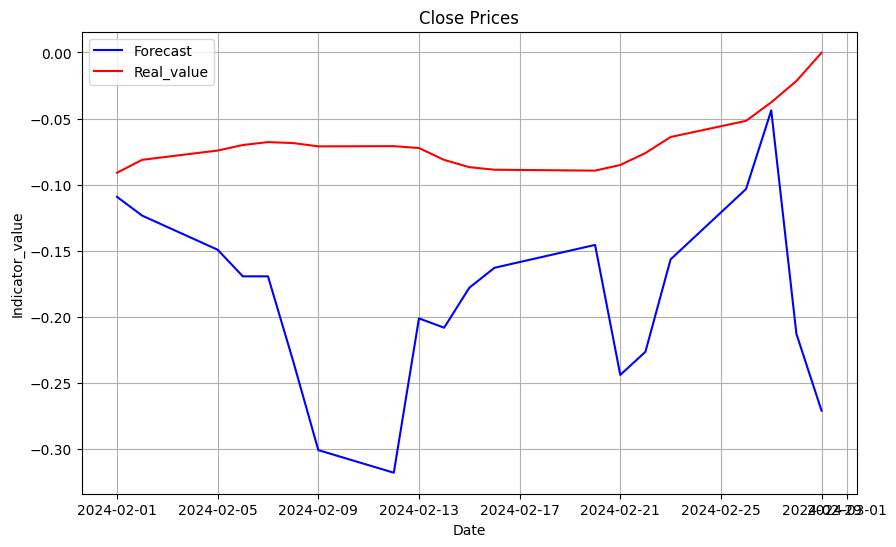

In [ ]:

# Plot close prices
plt.figure(figsize=(10, 6))
plt.plot(In_2ndM_dates, x, label='Forecast', color='blue')
plt.plot(In_2ndM_dates, In_2ndM, label='Real_value', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.title('Close Prices')
plt.legend()
plt.grid(True)
plt.show()



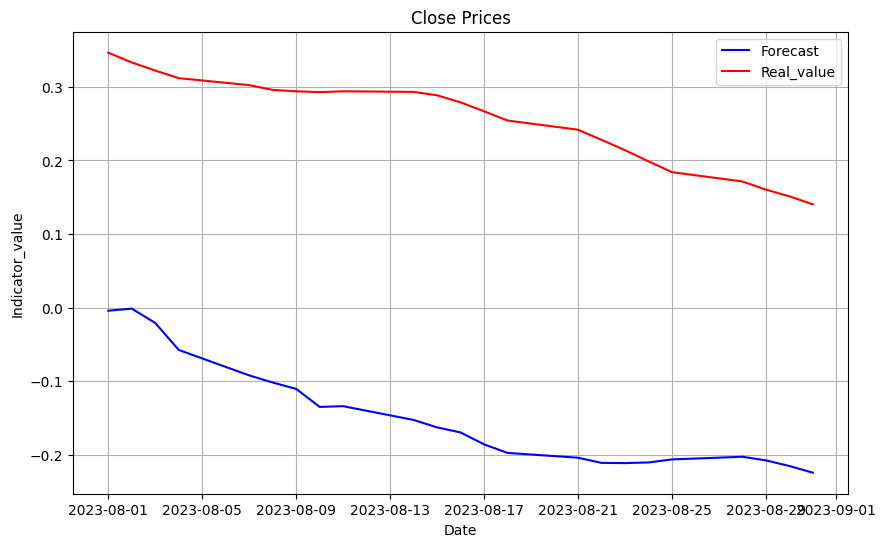

In [ ]:

# Plot close prices
plt.figure(figsize=(10, 6))
plt.plot(I_02_01_29_dates, my_forecast, label='Forecast', color='blue')
plt.plot(I_02_01_29_dates, I_02_01_29, label='Real_value', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.title('Close Prices')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
m1_d31 = df_close_prices['2024-02-01':]
m1_d31 = m1_d31.values

In [ ]:
m1_d31 = m1_d31.reshape(-1)

In [ ]:

m8_02 = [-0.1385755 , -0.11639749, -0.09009104, -0.05753588, -0.02593011,
        0.0138931 ,  0.04317953,  0.06806528,  0.08151595,  0.08968052,
        0.09001276,  0.08853895,  0.0982361 ,  0.09475058,  0.0890075 ,
        0.08212002,  0.08875568,  0.09822497,  0.08085814,  0.04543015,
         -0.0042944 , -0.00145125, -0.02095232, -0.05760289, -0.09220091,
       -0.10191438, -0.11055543, -0.13501796, -0.13404906, -0.15275419,
       -0.16288143, -0.16978821, -0.18591866, -0.1975666 , -0.20410192,
       -0.21111783, -0.21143201, -0.21053427, -0.20641705, -0.20279127,
       -0.2076903 , -0.21532503, -0.22449437,-0.10400721, -0.10437758,
       -0.11256723, -0.12213661, -0.13022833,-0.12690039, -0.09869662,
       -0.06618084, -0.03015744,  0.02361816,0.07362102,  0.09141226,
        0.10995276,  0.12337542,  0.13040288, 0.1436261 ,  0.15385391,
        0.16521634,  0.17783628,  0.18310626,0.16232342, 0.17511076,
        0.1835221 , 0.18598339, 0.18780398,0.18474075, 0.19675878,
        0.22597301, 0.26750606, 0.30596977,0.3363014 , 0.35367012,
        0.36455727, 0.38170058, 0.3971604 ,
        0.42523086, 0.4545166 , 0.48790568, 0.50112027, 0.5005424 ,
        0.4980672 , 0.4907558,0.35609385, 0.35400906, 0.35190007, 0.3471031 , 0.34473085,
       0.3395421 , 0.3359196 , 0.33154467, 0.33660486, 0.33143392,
       0.32361087, 0.32252654, 0.3100515 , 0.2949814 , 0.2949166 ,
       0.29104355, 0.28725764, 0.28680217, 0.28363597, 0.28420043,
       0.28673133,0.2682372 , 0.27259982, 0.2746067 , 0.27800566, 0.2739504 ,
       0.264704  , 0.24982011, 0.23617518, 0.22534835, 0.21401873,
       0.19769272, 0.18586203, 0.16648245, 0.15240544, 0.14163052,
       0.12614128, 0.11587613, 0.10005758, 0.0823888 , 0.06873436,0.09859033,  0.08553357,  0.0652819 ,  0.05792264,  0.03159519,
       -0.00664   , -0.03824294, -0.06964198, -0.08893231, -0.10133798,
       -0.11080403, -0.12265465, -0.12900645, -0.13563424, -0.1420156 ,
       -0.162644  , -0.17987233, -0.18964738, -0.19963762, -0.20340103,
       -0.19802958,-0.1023696 , -0.10967087, -0.11915206, -0.12003832, -0.1160379 ,
       -0.12293819, -0.1419875 , -0.15735221, -0.17058152, -0.1749346 ,
       -0.17214563, -0.15889847, -0.14236572, -0.11716949, -0.09062598,
       -0.05628931, -0.01222435,  0.02955987,  0.0608838 ,  0.08502819]



m8_02_T = [-0.07571002, -0.07252862, -0.06916375, -0.09357987, -0.11200296,
       -0.13676327, -0.16394201, -0.18117622, -0.19253346, -0.20321393,
       -0.22520891, -0.23581862, -0.23810023, -0.23793629, -0.22932813,
       -0.2219221 , -0.2163935 , -0.21273202, -0.20559058, -0.19280961, -0.3009121 , -0.30007508, -0.30003992, -0.3000417 , -0.29738566,
       -0.29759696, -0.29965472, -0.29868135, -0.30368093, -0.30447927,
       -0.3002706 , -0.2992554 , -0.30143014, -0.2962204 , -0.29264063,
       -0.2891786 , -0.28483143, -0.28895563, -0.29645935, -0.3060449 ,
       -0.31442627, -0.31410953, -0.3082925,-0.0608979 , -0.08337501, -0.11032595, -0.14263962, -0.16585745,
       -0.17998014, -0.1904821 , -0.19959365, -0.20062976, -0.20373853,
       -0.20433404, -0.20222606, -0.20456858, -0.20717217, -0.20406727,
       -0.20918147, -0.20986949, -0.20863698, -0.20830522, -0.20608582,0.2683888 ,
       0.2833321 , 0.30033982, 0.33937728, 0.37180746,
       0.41263455, 0.44209075, 0.45595372, 0.45774585, 0.4581046 ,
       0.44720715, 0.42053568, 0.38495052, 0.3584839 , 0.33779627,
       0.3060182 , 0.30086952, 0.2895863 , 0.2869047 , 0.28726548,
       0.3019365 , 0.30358186,0.25077543, 0.32110617, 0.35114607, 0.37691805, 0.39503655,
       0.4136498 , 0.42849317, 0.43485895, 0.43749508, 0.440214  ,
       0.43405834, 0.42658257, 0.4185217 , 0.40700457, 0.38741952,
       0.36723122, 0.317068  , 0.2889928 , 0.26087287, 0.23253521,
       0.201838 ,0.2164169 , 0.22174206, 0.22526652, 0.22435689, 0.228872  ,
       0.2317093 , 0.22347379, 0.22106534, 0.22128212, 0.23069733,
       0.23998913, 0.25268936, 0.2671605 , 0.2842865 , 0.2947197 ,
       0.3039018 , 0.32205135, 0.3293148 , 0.32456288, 0.29383063,
      -0.3304034 , -0.3278165 , -0.32217038, -0.3175157 , -0.31073454,
       -0.313672  , -0.3075499 , -0.3008987 , -0.2947122 , -0.2926394 ,
       -0.30237705, -0.31533545, -0.32494053, -0.32381445, -0.31693017,
       -0.31273854, -0.3140229 , -0.30851868, -0.29931176, -0.28501722,
       -0.27170283,-0.5498102 , -0.55859125, -0.5653233 , -0.57084244, -0.57228994,
       -0.58082116, -0.58954924, -0.5977118 , -0.5772773 , -0.55600756,
       -0.5298846 , -0.50857323, -0.483402  , -0.44945973, -0.39735168,
       -0.3572    , -0.3121543 , -0.27416494, -0.23494574, -0.17412794]





In [ ]:
len(m8_02) , len(m8_02_T)

(167, 167)

In [ ]:
trix_data1['2023-07-01':'2024-02-29'].shape

(167, 1)

In [ ]:
I_08_012_M = (trix_data1['2023-07-01':'2024-02-29'].values).reshape(-1)
I_08_012_M_dates = trix_data1['2023-07-01':'2024-02-29'].index
I_08_012_M

array([ 2.52877482e-01,  2.74696567e-01,  2.92053196e-01,  3.07724666e-01,
        3.22131812e-01,  3.39141441e-01,  3.60419271e-01,  3.83569670e-01,
        3.98963845e-01,  4.04722852e-01,  4.05486213e-01,  4.01818848e-01,
        3.96594380e-01,  3.91514150e-01,  3.86616093e-01,  3.81252176e-01,
        3.75566492e-01,  3.68864508e-01,  3.60993681e-01,  3.54736327e-01,
        3.46368367e-01,  3.33127761e-01,  3.22138993e-01,  3.11766889e-01,
        3.02334914e-01,  2.95830812e-01,  2.93896867e-01,  2.92828512e-01,
        2.93928524e-01,  2.93131323e-01,  2.88497314e-01,  2.78850557e-01,
        2.66763286e-01,  2.54183025e-01,  2.41712696e-01,  2.27938828e-01,
        2.13945279e-01,  1.98726659e-01,  1.84037944e-01,  1.71367348e-01,
        1.60283033e-01,  1.51218121e-01,  1.40283199e-01,  1.29447706e-01,
        1.17170653e-01,  1.00139452e-01,  8.30392483e-02,  6.39826538e-02,
        4.35388535e-02,  2.63214733e-02,  1.26618349e-02,  5.11386037e-03,
       -7.19726560e-04, -

In [ ]:
import pandas as pd

# Assuming I_08_012_M_dates and I_08_012_M are numpy arrays or lists
# Convert them to pandas Series
series_dates = pd.Series(I_08_012_M_dates)
series_values = pd.Series(I_08_012_M)

# Create DataFrame
df = pd.DataFrame({'Dates': series_dates, 'MACD': series_values})

# Set 'Dates' column as index if it represents dates
df.set_index('Dates', inplace=True)

# Add 'm8_02' column
df['predict_values'] = m8_02
df['predict_values_T'] = m8_02_T
df['Close'] = df_close_prices['2023-07-01':'2024-02-29']
df

,MACD,predict_values,predict_values_T,Close
Dates,,,,
2023-07-03,0.252877,-0.138575,-0.075710,32.720001
2023-07-05,0.274697,-0.116397,-0.072529,32.459999
2023-07-06,0.292053,-0.090091,-0.069164,32.369999
2023-07-07,0.307725,-0.057536,-0.093580,32.730000
2023-07-10,0.322132,-0.025930,-0.112003,32.910000
...,...,...,...,...
2024-02-23,-0.063971,-0.056289,-0.357200,34.939999
2024-02-26,-0.051749,-0.012224,-0.312154,34.720001
2024-02-27,-0.037740,0.029560,-0.274165,35.040001


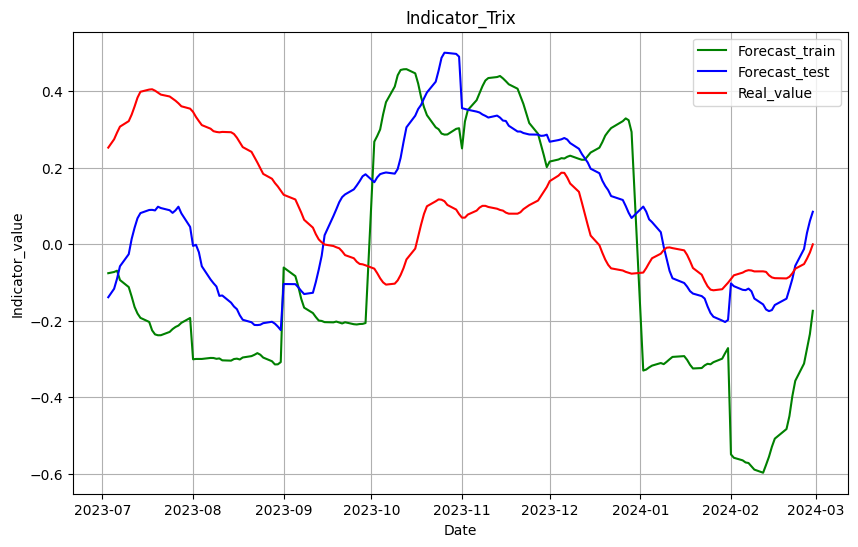

In [ ]:
# Plot close prices
plt.figure(figsize=(10, 6))

plt.plot(I_08_012_M_dates, m8_02_T, label='Forecast_train', color='green')
plt.plot(I_08_012_M_dates, m8_02, label='Forecast_test', color='blue')
plt.plot(I_08_012_M_dates, I_08_012_M, label='Real_value', color='red')

plt.xlabel('Date')
plt.ylabel('Indicator_value')
plt.title('Indicator_Trix')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def w_port_MACD(combined_df: pd.DataFrame) -> pd.DataFrame:
    buy = 0
    count_day = 0
    my_wallet_values = []
    my_date_sell = []
    my_wallet = 1_000_000  # initial_cash 1_000_000
    #num_shares_bought = 1000

    my_day = combined_df.index.values
    my_close = combined_df['Close'].values
    my_MACD = combined_df['MACD'].values
    predict_values = combined_df['predict_values'].values
    predict_values_T = combined_df['predict_values_T'].values

    num = 0  # Choose day or random day --> This case choose first day
    select_day = my_day[num]

    count_day = num
    print("start_day = ", my_day[num])

    for i in range(combined_df.shape[0] - 1):
        if num == (combined_df.shape[0] - 1) or count_day == (combined_df.shape[0] - 1):  # day still run
            print("my_money = ", my_wallet)
            break

        elif predict_values_T[num] > 0 :   #my_ADX[num] > 25 or my_TRIX[num] > 0
            buy = my_close[num]  # ซื้อที่ราคาปิดเท่านี้
            count_day = count_day + 1

            if predict_values_T[count_day] < 0 :  # จะขายถ้าเป้น -
                next_buy = my_close[count_day]  # sell
                diff_price = next_buy - buy

                num_shares_bought = my_wallet // buy
                #print(num_shares_bought)
                my_wallet = my_wallet + (num_shares_bought * diff_price)
                my_x = my_day[count_day]

                my_date_sell.append(my_x)
                my_wallet_values.append(my_wallet)

                num = count_day
            else:
                pass

        else:
            num = num + 1
            count_day = num

    print(f'my_wallet = {my_wallet:,.0f}')
    # Plotting the my_wallet values over time
    #print(my_date_sell)

    #plt.plot(my_date_sell, my_wallet_values, label='My Wallet')
    #plt.xlabel('Date')
    #plt.ylabel('Portfolio Value')
    #plt.title('Portfolio Value Over Time')
    #plt.legend()
    #plt.show()



In [ ]:
w_port_MACD(df)

start_day =  2023-07-03T00:00:00.000000000
my_wallet = 1,078,651


In [ ]:
w_port_MACD(df)

start_day =  2023-07-03T00:00:00.000000000
my_wallet = 1,048,358


In [ ]:
w_port_MACD(df)

start_day =  2023-07-03T00:00:00.000000000
my_wallet = 1,014,430


In [ ]:
def wo_port_MACD(combined_df: pd.DataFrame) -> pd.DataFrame:
  buy = 0
  count_day = 0
  my_wallet = 0
  num = 0  ## Choose day or random day

  my_day = combined_df.index.values
  my_close = combined_df['Close'].values
  my_MACD = combined_df['MACD'].values
  predict_values = combined_df['predict_values'].values

  select_day = my_day[num]
  print(f'{select_day = }')

  count_day = num
  #print("start_day = ",my_day[num])

  for i in range(combined_df.shape[0]-1):

    if num == (combined_df.shape[0]-1) or count_day == (combined_df.shape[0]-1) :  ## day still run
      print("my_money = ",my_wallet)
      break

    elif predict_values[num] > 0:
      buy = my_close[num]  ## ซื้อที่ราคาปิดเท่านี้
      count_day = count_day+1
      # print(my_day[num])

      if predict_values[count_day] < 0: ## จะขายถ้าเป้น -
        next_buy = my_close[count_day]
        diff_price = next_buy - buy
        my_wallet =  my_wallet +diff_price
        num = count_day
      else:
        #print("indicator still = +")
        pass

    else:
      num = num + 1
      count_day = num
  print('my_wallet_macd =',my_wallet)

In [ ]:
wo_port_MACD(df)

select_day = numpy.datetime64('2023-07-03T00:00:00.000000000')
my_wallet_macd = 1.6299972534179688
